In [13]:
from numba import jit, vectorize, int32, float32
import ctypes
import numpy as np
import time
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# Python function to compute pi

In [14]:
def f(x):
    return 4. / (1. + x * x)

In [15]:
def compPi(niter=10000000):
    h = 1. / niter
    pi = 0.
    for i in range(niter):
        x = h * (i - 0.5)
        pi += f(x)
    error = abs(np.arccos(-1.) - pi * h) / np.arccos(-1.)
    return pi * h, error

In [ ]:
# The Just-In-Time-compiled version

In [16]:
@jit(float32(float32), nogil=True)
def f_numba(x):
    return 4. / (1. + x * x)

In [17]:
@jit(float32(int32), nogil=True)
def compPi_numba(niter):
    h = 1. / niter
    pi = 0.
    for i in range(niter):
        x = h * (i - 0.5)
        pi += f_numba(x)
    error = abs(np.arccos(-1.) - pi * h) / np.arccos(-1.)
    return pi * h, error

In [22]:
def main():
    # import the C library
    mylib = ctypes.CDLL('pi_c.so')
    # declare result type: default is int
    mylib.compPi_ctypes.restype = ctypes.c_double
    # declare arguments type
    pi = ctypes.c_double(0.)
    # niter = ctypes.c_int(1000)

    numIter = [1000, 10000, 100000, 1000000, 10000000]

    for i in numIter:
        print("\nn iter: {}".format(i))
        # Numba
        start = time.clock()
        compPi_numba(i)
        stop = time.clock()
        numba_time = stop - start
        print("numba function takes: {}".format(numba_time))

        # Ctype
        niter = ctypes.c_int(i)
        start = time.clock()
        mylib.compPi_ctypes(pi, niter)
        stop = time.clock()
        c_time = stop - start
        print("time for c version: {}".format(c_time))

        # Pure Python
        start = time.clock()
        compPi(i)
        stop = time.clock()
        nonumba_time = stop - start
        print("Pure Python function takes: {}".format(nonumba_time))

        with open('results_nogil.dat', 'a') as file:
            file.write(str(i) + "\t" + str(numba_time) +
                       "\t" + str(nonumba_time) +
                       "\t" + str(c_time) + "\n")

In [28]:
main()


n iter: 1000
numba function takes: 0.00010999999999938836
time for c version: 0.00023600000000101318
Pure Python function takes: 0.0011790000000004852

n iter: 10000
numba function takes: 0.00025099999999866895
time for c version: 0.000332000000000221
Pure Python function takes: 0.005340999999994267

n iter: 100000
numba function takes: 0.0012760000000042737
time for c version: 0.0015679999999989036
Pure Python function takes: 0.051225000000002296

n iter: 1000000
numba function takes: 0.008468000000000586
time for c version: 0.009128000000004022
Pure Python function takes: 0.46311099999999783

n iter: 10000000
numba function takes: 0.0726230000000001
time for c version: 0.14945299999999406
Pure Python function takes: 4.812451000000003


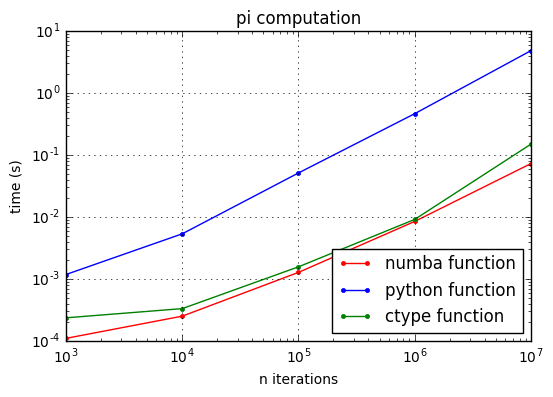

In [29]:
x, y, z, w = np.loadtxt('results_nogil.dat', delimiter='\t', unpack=True)

plt.plot(x, y, 'r.-', label = 'numba function')
plt.plot(x, z, 'b.-', label = 'python function')
plt.plot(x, w, 'g.-', label = 'ctype function')
plt.ylabel('time (s)')
plt.xlabel('n iterations')
plt.yscale('log')
plt.xscale('log')
plt.legend(loc='lower right')
plt.grid(True)
plt.title('pi computation')